In [4]:
# Import libraries
import numpy as np  # Linear algebra
import pandas as pd  # Data processing, CSV file I/O (e.g., pd.read_csv)
import matplotlib.pyplot as plt  # Data visualization
import seaborn as sns  # Data visualization extensions
from sklearn.cluster import KMeans  # K-means clustering
from sklearn.preprocessing import RobustScaler  # Robust scaler due to data quality concerns
from sklearn import metrics  # Model evaluation

import random  # Random number generator and setting seed

# Settings
random.seed(42)  # Set random seed for reproducibility

#Read DataSet off of computer
df = pd.read_csv('C:/Users/jefft/Desktop/WGU Classes/D212/Churn_clean.csv', index_col=0)

df

,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,...,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
CaseOrder,,,,,,,,,,,,,,,,,,,,,
1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,38,...,172.455519,904.536110,5,5,5,3,4,4,3,4
2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,10446,...,242.632554,800.982766,3,4,3,3,4,3,4,4
3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,3735,...,159.947583,2054.706961,4,4,2,4,4,3,3,3
4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,Del Mar,CA,San Diego,92014,32.96687,-117.24798,13863,...,119.956840,2164.579412,4,4,4,2,5,4,3,3
5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,Needville,TX,Fort Bend,77461,29.38012,-95.80673,11352,...,149.948316,271.493436,4,4,4,3,4,4,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,M324793,45deb5a2-ae04-4518-bf0b-c82db8dbe4a4,9499fb4de537af195d16d046b79fd20a,Mount Holly,VT,Rutland,5758,43.43391,-72.78734,640,...,159.979400,6511.252601,3,2,3,3,4,3,2,3
9997,D861732,6e96b921-0c09-4993-bbda-a1ac6411061a,c09a841117fa81b5c8e19afec2760104,Clarksville,TN,Montgomery,37042,36.56907,-87.41694,77168,...,207.481100,5695.951810,4,5,5,4,4,5,2,5
9998,I243405,e8307ddf-9a01-4fff-bc59-4742e03fd24f,9c41f212d1e04dca84445019bbc9b41c,Mobeetie,TX,Wheeler,79061,35.52039,-100.44180,406,...,169.974100,4159.305799,4,4,4,4,4,4,4,5


In [5]:
# List of continuous variables for analysis
cont_variables = ['Age', 'Income', 'Outage_sec_perweek', 'MonthlyCharge', 'Bandwidth_GB_Year', 'Tenure']

# List of statistically significant variables
significant_variables = ['Age', 'MonthlyCharge', 'Bandwidth_GB_Year']

In [6]:
df_continuous = df[cont_variables]
df_continuous.head()

,Age,Income,Outage_sec_perweek,MonthlyCharge,Bandwidth_GB_Year,Tenure
CaseOrder,,,,,,
1,68,28561.99,7.978323,172.455519,904.536110,6.795513
2,27,21704.77,11.699080,242.632554,800.982766,1.156681
3,50,9609.57,10.752800,159.947583,2054.706961,15.754144
4,48,18925.23,14.913540,119.956840,2164.579412,17.087227
5,83,40074.19,8.147417,149.948316,271.493436,1.670972


In [7]:
# Initialize the RobustScaler
scaler = RobustScaler()

# Copy the continuous data to avoid altering the original dataset
df_scaled_copy = df_continuous.copy()

# Apply the scaling transformation
scaled_data = scaler.fit_transform(df_scaled_copy)

# Convert the scaled data back to a DataFrame with original column names
df_scaled_final = pd.DataFrame(scaled_data, columns=df_continuous.columns)

# Display the first few rows of the scaled DataFrame
df_scaled_final.head()

,Age,Income,Outage_sec_perweek,MonthlyCharge,Bandwidth_GB_Year,Tenure
0,0.416667,-0.135462,-0.516350,0.081817,-0.546019,-0.534613
1,-0.722222,-0.337018,0.425311,1.236890,-0.569826,-0.639889
2,-0.083333,-0.692535,0.185824,-0.124057,-0.281591,-0.367356
3,-0.138889,-0.418717,1.238837,-0.782281,-0.256331,-0.342468
4,0.833333,0.202919,-0.473555,-0.288639,-0.691557,-0.630288


In [8]:
# Select only the statistically significant variables from the scaled dataset
df_reduced_scaled = df_scaled_final[significant_variables]

# Display the first few rows of the reduced DataFrame
df_reduced_scaled.head()

,Age,MonthlyCharge,Bandwidth_GB_Year
0,0.416667,0.081817,-0.546019
1,-0.722222,1.236890,-0.569826
2,-0.083333,-0.124057,-0.281591
3,-0.138889,-0.782281,-0.256331
4,0.833333,-0.288639,-0.691557


In [9]:
# Export the fully scaled dataset to a CSV file
df_scaled_final.to_csv('kmeansfull_scaled.csv', index=False)
# Export the reduced dataset with statistically significant variables to a CSV file
df_reduced_scaled.to_csv('kmeansreduced_scaled.csv', index=False)

In [10]:
#Here starts kmeans clustering
def compute_kmeans_sse(data, num_clusters):
    """
    Computes the Sum of Squared Errors (SSE) for K-means clustering on a dataset.
    
    Parameters:
        data (array-like): The data you want to cluster.
        num_clusters (int): The number of clusters (k value) for K-means.
    
    Returns:
        float: The SSE score for the fitted K-means model.
    """
    # Initialize the K-means model
    kmeans_model = KMeans(n_clusters=num_clusters)
    # Fit the K-means model to the data
    kmeans_model.fit(data)
    # Compute the SSE (score)
    sse = np.abs(kmeans_model.score(data))
    return sse
# Measure the execution time of the following code block
%time
# Evaluate the SSE for different numbers of clusters
sse_scores = []
cluster_range = list(range(1, 20))
for k in cluster_range:
    sse_scores.append(compute_kmeans_sse(df_scaled_final, k))

CPU times: total: 0 ns
Wall time: 0 ns


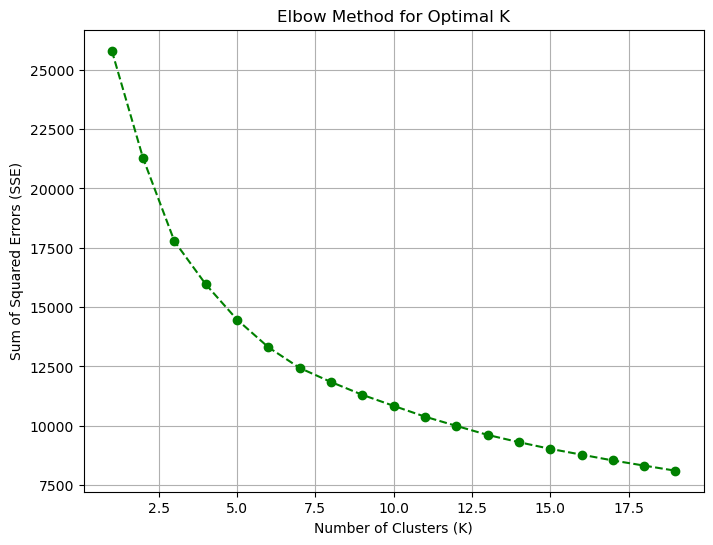

In [11]:
import matplotlib.pyplot as plt
# Define the range of cluster centers (K values)
centers = list(range(1, 20))
# Plot SSE scores against the number of clusters
plt.figure(figsize=(8, 6))
plt.plot(centers, sse_scores, linestyle='--', marker='o', color='g')  # Changed color to green ('g')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Elbow Method for Optimal K')
plt.grid(True)
plt.show()

In [12]:
import time
# Measure the execution time of the following code block
start_time = time.time()
# Initialize an empty list to store SSE scores
red_scores = []
# Define the range of cluster centers (K values)
centers = list(range(1, 20))
# Compute SSE scores for reduced dataset
for center in centers:
    red_scores.append(compute_kmeans_sse(df_reduced_scaled, center))  # Assuming df_reduced_scaled is used for reduced dataset
# Calculate and print the execution time
execution_time = time.time() - start_time
print(f"Execution time: {execution_time:.2f} seconds")

Execution time: 5.66 seconds


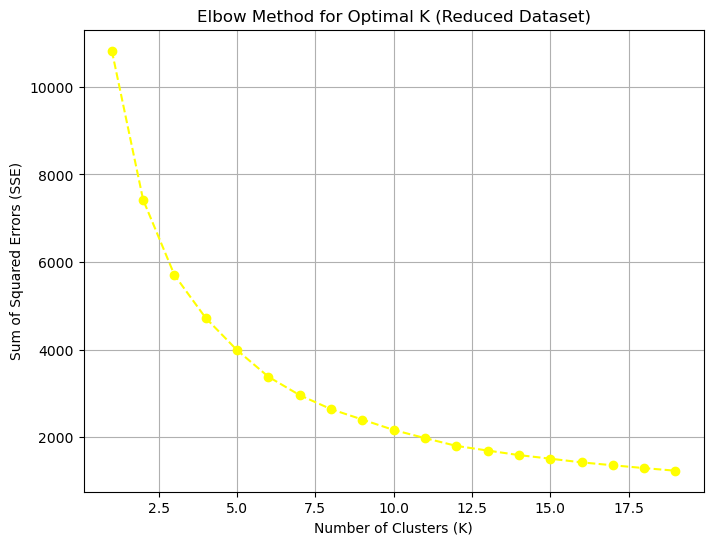

In [13]:

# Define the range of cluster centers (K values)
centers = list(range(1, 20))
# Plot SSE scores against the number of clusters for reduced dataset
plt.figure(figsize=(8, 6))
plt.plot(centers, red_scores, linestyle='--', marker='o', color='yellow')  # Changed color to yellow ('yellow')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Elbow Method for Optimal K (Reduced Dataset)')
plt.grid(True)
plt.show()

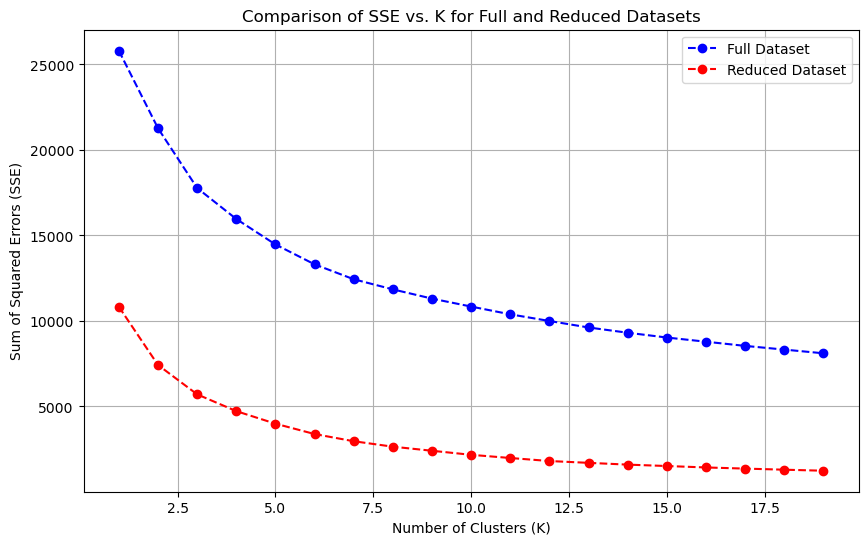

In [14]:
# Define the range of cluster centers (K values)
centers = list(range(1, 20))
# Plot SSE scores against the number of clusters for full dataset (blue)
plt.figure(figsize=(10, 6))
plt.plot(centers, sse_scores, linestyle='--', marker='o', color='b', label='Full Dataset')
# Plot SSE scores against the number of clusters for reduced dataset (red)
plt.plot(centers, red_scores, linestyle='--', marker='o', color='r', label='Reduced Dataset')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Comparison of SSE vs. K for Full and Reduced Datasets')
plt.grid(True)
plt.legend()
plt.show()

In [15]:
# Instantiate KMeans with 3 clusters for both full and reduced datasets
kmeans_full = KMeans(n_clusters=3)
kmeans_reduced = KMeans(n_clusters=3)

# Fit KMeans models to the scaled datasets
fullmodel = kmeans_full.fit(df_scaled_final)
reducedmodel = kmeans_reduced.fit(df_reduced_scaled)

# Compute silhouette scores for both models
silhouette_score_full = metrics.silhouette_score(df_scaled_final, fullmodel.labels_)
silhouette_score_reduced = metrics.silhouette_score(df_reduced_scaled, reducedmodel.labels_)

silhouette_score_full, silhouette_score_reduced

(0.2029677688791523, 0.2728988272139888)